# FAQ as a Data Science Newbie

Data science related job is hot in the industry now. A lot of industry realizing the importance of data for their business.
It is expected that the job related with data science will continue to increase each year.

If you are interested in data science, whether you're a student or thinking of switching your career. You must've had this kind of questions popping in your head. Trust me, I've been there as this is also the questions I ask myself when I started my Data Science Journey.

# The Dataset

In early this year, Kaggle held an analytics competition of '2020 Kaggle Machine Learning & Data Science Survey'. The challenge is to deeply explore (through data) the impact, priorities, or concerns of a specific group of data science and machine learning practitioners.

**Methodology** : The dataset is from a survey that Kaggle did by sending invitation to the entire Kaggle commmunity. It was also promoted on the Kaggle website and Twitter. The survey was from 7-30 October 2020.

**Note** : The questions consist of single and multiple choice questions. For the single choice questions, the answer were recorded in an individual columns. While for the multiple choice questions, the responses were split into multiple columns (with one column per answer)

**Source** : Kaggle - https://www.kaggle.com/c/kaggle-survey-2020/overview

# The Project Purpose 

The purpose of this project is to answer the most frequently asked question people usually asked when they're starting this data science journey.

Questions like "Am I too old to start?" "Do I have to have a higher education?" "Where should I learn?" "What programming language should I learn?"

In [144]:
#Import the relevant modules
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns 

In [145]:
#Import the data
df = pd.read_csv('kaggle_survey_2020_responses.csv')

#See the shape of the data
df.shape

C:\Users\Dinda\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3071: DtypeWarning: Columns (0) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


(20037, 355)

In [146]:
#Display all columns
pd.set_option('display.max_columns',500)
pd.set_option('display.max_rows',500)

#See through the data
df.head()

,Time from Start to Finish (seconds),Q1,Q2,Q3,Q4,Q5,Q6,Q7_Part_1,Q7_Part_2,Q7_Part_3,Q7_Part_4,Q7_Part_5,Q7_Part_6,Q7_Part_7,Q7_Part_8,Q7_Part_9,Q7_Part_10,Q7_Part_11,Q7_Part_12,Q7_OTHER,Q8,Q9_Part_1,Q9_Part_2,Q9_Part_3,Q9_Part_4,Q9_Part_5,Q9_Part_6,Q9_Part_7,Q9_Part_8,Q9_Part_9,Q9_Part_10,Q9_Part_11,Q9_OTHER,Q10_Part_1,Q10_Part_2,Q10_Part_3,Q10_Part_4,Q10_Part_5,Q10_Part_6,Q10_Part_7,Q10_Part_8,Q10_Part_9,Q10_Part_10,Q10_Part_11,Q10_Part_12,Q10_Part_13,Q10_OTHER,Q11,Q12_Part_1,Q12_Part_2,Q12_Part_3,Q12_OTHER,Q13,Q14_Part_1,Q14_Part_2,Q14_Part_3,Q14_Part_4,Q14_Part_5,Q14_Part_6,Q14_Part_7,Q14_Part_8,Q14_Part_9,Q14_Part_10,Q14_Part_11,Q14_OTHER,Q15,Q16_Part_1,Q16_Part_2,Q16_Part_3,Q16_Part_4,Q16_Part_5,Q16_Part_6,Q16_Part_7,Q16_Part_8,Q16_Part_9,Q16_Part_10,Q16_Part_11,Q16_Part_12,Q16_Part_13,Q16_Part_14,Q16_Part_15,Q16_OTHER,Q17_Part_1,Q17_Part_2,Q17_Part_3,Q17_Part_4,Q17_Part_5,Q17_Part_6,Q17_Part_7,Q17_Part_8,Q17_Part_9,Q17_Part_10,Q17_Part_11,Q17_OTHER,Q18_Part_1,Q18_Part_2,Q18_Part_3,Q18_Part_4,Q18_Part_5,Q18_Part_6,Q18_OTHER,Q19_Part_1,Q19_Part_2,Q19_Part_3,Q19_Part_4,Q19_Part_5,Q19_OTHER,Q20,Q21,Q22,Q23_Part_1,Q23_Part_2,Q23_Part_3,Q23_Part_4,Q23_Part_5,Q23_Part_6,Q23_Part_7,Q23_OTHER,Q24,Q25,Q26_A_Part_1,Q26_A_Part_2,Q26_A_Part_3,Q26_A_Part_4,Q26_A_Part_5,Q26_A_Part_6,Q26_A_Part_7,Q26_A_Part_8,Q26_A_Part_9,Q26_A_Part_10,Q26_A_Part_11,Q26_A_OTHER,Q27_A_Part_1,Q27_A_Part_2,Q27_A_Part_3,Q27_A_Part_4,Q27_A_Part_5,Q27_A_Part_6,Q27_A_Part_7,Q27_A_Part_8,Q27_A_Part_9,Q27_A_Part_10,Q27_A_Part_11,Q27_A_OTHER,Q28_A_Part_1,Q28_A_Part_2,Q28_A_Part_3,Q28_A_Part_4,Q28_A_Part_5,Q28_A_Part_6,Q28_A_Part_7,Q28_A_Part_8,Q28_A_Part_9,Q28_A_Part_10,Q28_A_OTHER,Q29_A_Part_1,Q29_A_Part_2,Q29_A_Part_3,Q29_A_Part_4,Q29_A_Part_5,Q29_A_Part_6,Q29_A_Part_7,Q29_A_Part_8,Q29_A_Part_9,Q29_A_Part_10,Q29_A_Part_11,Q29_A_Part_12,Q29_A_Part_13,Q29_A_Part_14,Q29_A_Part_15,Q29_A_Part_16,Q29_A_Part_17,Q29_A_OTHER,Q30,Q31_A_Part_1,Q31_A_Part_2,Q31_A_Part_3,Q31_A_Part_4,Q31_A_Part_5,Q31_A_Part_6,Q31_A_Part_7,Q31_A_Part_8,Q31_A_Part_9,Q31_A_Part_10,Q31_A_Part_11,Q31_A_Part_12,Q31_A_Part_13,Q31_A_Part_14,Q31_A_OTHER,Q32,Q33_A_Part_1,Q33_A_Part_2,Q33_A_Part_3,Q33_A_Part_4,Q33_A_Part_5,Q33_A_Part_6,Q33_A_Part_7,Q33_A_OTHER,Q34_A_Part_1,Q34_A_Part_2,Q34_A_Part_3,Q34_A_Part_4,Q34_A_Part_5,Q34_A_Part_6,Q34_A_Part_7,Q34_A_Part_8,Q34_A_Part_9,Q34_A_Part_10,Q34_A_Part_11,Q34_A_OTHER,Q35_A_Part_1,Q35_A_Part_2,Q35_A_Part_3,Q35_A_Part_4,Q35_A_Part_5,Q35_A_Part_6,Q35_A_Part_7,Q35_A_Part_8,Q35_A_Part_9,Q35_A_Part_10,Q35_A_OTHER,Q36_Part_1,Q36_Part_2,Q36_Part_3,Q36_Part_4,Q36_Part_5,Q36_Part_6,Q36_Part_7,Q36_Part_8,Q36_Part_9,Q36_OTHER,Q37_Part_1,Q37_Part_2,Q37_Part_3,Q37_Part_4,Q37_Part_5,Q37_Part_6,Q37_Part_7,Q37_Part_8,Q37_Part_9,Q37_Part_10,Q37_Part_11,Q37_OTHER,Q38,Q39_Part_1,Q39_Part_2,Q39_Part_3,Q39_Part_4,Q39_Part_5,Q39_Part_6,Q39_Part_7,Q39_Part_8,Q39_Part_9,Q39_Part_10,Q39_Part_11,Q39_OTHER,Q26_B_Part_1,Q26_B_Part_2,Q26_B_Part_3,Q26_B_Part_4,Q26_B_Part_5,Q26_B_Part_6,Q26_B_Part_7,Q26_B_Part_8,Q26_B_Part_9,Q26_B_Part_10,Q26_B_Part_11,Q26_B_OTHER,Q27_B_Part_1,Q27_B_Part_2,Q27_B_Part_3,Q27_B_Part_4,Q27_B_Part_5,Q27_B_Part_6,Q27_B_Part_7,Q27_B_Part_8,Q27_B_Part_9,Q27_B_Part_10,Q27_B_Part_11,Q27_B_OTHER,Q28_B_Part_1,Q28_B_Part_2,Q28_B_Part_3,Q28_B_Part_4,Q28_B_Part_5,Q28_B_Part_6,Q28_B_Part_7,Q28_B_Part_8,Q28_B_Part_9,Q28_B_Part_10,Q28_B_OTHER,Q29_B_Part_1,Q29_B_Part_2,Q29_B_Part_3,Q29_B_Part_4,Q29_B_Part_5,Q29_B_Part_6,Q29_B_Part_7,Q29_B_Part_8,Q29_B_Part_9,Q29_B_Part_10,Q29_B_Part_11,Q29_B_Part_12,Q29_B_Part_13,Q29_B_Part_14,Q29_B_Part_15,Q29_B_Part_16,Q29_B_Part_17,Q29_B_OTHER,Q31_B_Part_1,Q31_B_Part_2,Q31_B_Part_3,Q31_B_Part_4,Q31_B_Part_5,Q31_B_Part_6,Q31_B_Part_7,Q31_B_Part_8,Q31_B_Part_9,Q31_B_Part_10,Q31_B_Part_11,Q31_B_Part_12,Q31_B_Part_13,Q31_B_Part_14,Q31_B_OTHER,Q33_B_Part_1,Q33_B_Part_2,Q33_B_Part_3,Q33_B_Part_4,Q33_B_Part_5,Q33_B_Part_6,Q33_B_Part_7,Q33_B_OTHER,Q34_B_Part_1,Q34_B_Part_2,Q34_B_Part_3,Q34_B_Part_4,Q34_B_Part_5,Q34_B_Part_6,Q34_B_Part_7,Q34_

Here we can see that the first row is the questions detailed. So what I will do is :
1. Seperate the questions detail from the dataset and combine it into a dictionary with the columns name
2. Remove the first row from the dataset

In [147]:
#Put together the questions number and questions detail, skip the column that have multiple column for the answer
#The column name consist of 3 type :
#1. Time from Start to Finish (seconds)
#2. Q1
#3. Q7_Part_1

questions = {}
for i in range(len(df.columns)):
    if i==0 or len(df.columns[i])<3: #i=0 where the name of the columns is not consist of Q and where the name of the columns is only Q1, Q2
        questions[df.columns[i]]=df.iloc[0,i]
    elif len(df.columns[i])>=3: #this is for the Q7_Part_1 case 
        if len(df.columns[i].split('_'))>3:
            questions[df.columns[i][:5]]=df.iloc[0,i]
        else:
            questions[df.columns[i].split('_')[0]]=df.iloc[0,i]
    elif df.columns[i].split('_')[0]==df.columns[i-1].split('_')[0] and len(df.columns[i].split('_'))==3:#this case is for the Q7_Part_1 so they will skip the Q7_Part_2 
        pass

In [148]:
#Remove the detailed questions from the dataset
dataset = df.iloc[1:,:]

**Seperate the dataset into Data Analyst and Data Scientist**

Because the main focus of the project is to analyze between data analyst and data scientist, I will divide it into a new data with that specific role.

In [149]:
#Divide the dataset based on the role
data_analyst = dataset[dataset['Q5']=='Data Analyst']
data_scientist = dataset[dataset['Q5']=='Data Scientist']

#Reset the index
data_analyst['index']=[i for i in range(len(data_analyst))]
data_analyst = data_analyst.set_index('index')

data_scientist['index']=[i for i in range(len(data_scientist))]
data_scientist = data_scientist.set_index('index')

<ipython-input-149-c6bd1a9bd86a>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_analyst['index']=[i for i in range(len(data_analyst))]
<ipython-input-149-c6bd1a9bd86a>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_scientist['index']=[i for i in range(len(data_scientist))]


**The function used**

**Function used for multiple questions** : (ex : Q7_Part_1, Q7_Part_2, etc)

    col = the column name (ex: Q7)
    data = the dataset (ex : dataset, data_analyst, data_scientist)
    
    return Q dictionary consist of the answer and the sum of the respondent who pick those answer

In [150]:
#Function for multiple questions
def mul_q(col, data):
    #Get the column name for the Q9 part
    Q_name = [i for i in dataset.columns if i.split('_')[0]==col]

    #Get the multiple answer from each columns
    Q_answer = []
    for i in Q_name : 
        Q_answer.extend(data[i].value_counts().keys())

    #Get value count from each columns
    Q_count = []
    for i in Q_name : 
        Q_count.extend(data[i].value_counts().tolist())

    #Put it into dictionary
    Q = {}
    for i in range(len(Q_answer)):
        Q[Q_answer[i]]=Q_count[i]
        
    #Sort based on the value
    Q = dict(sorted(Q.items(), key=lambda item: item[1], reverse=True))

    return(Q)

**Function for one answer** (ex : Q1, Q2, etc)

    data = the dataset used (ex : dataset, data_analyst, data_scientist)
    col = the columns name (ex : Q1, Q2, etc)
    
    return Q dictionary consist of the answer and the sum of the respondent who pick those answer

In [151]:
def one_ans(col, data):
    #Get the name and value count for the questions
    Q_name = data[col].value_counts().keys()

    Q_count = data[col].value_counts().tolist()

    #Put it into dictionary 
    Q = {}
    for i in range(len(Q_name)):
        Q[Q_name[i]]=Q_count[i]

    return(Q)

**Function for making a side by side bar**

    label   : ticks for x
    bar1    : comparison 1
    label1  : label for comparison 1
    bar2    : comparison 2
    label2  : label for comparison 2

    title   : graph title
    xlabel  : x label
    ylabel  : y label
    
    fig_length : figure length 
    fig_height : figure height

In [152]:
def side_bar(label, bar1, label1, bar2, label2,  title, xlabel, ylabel, fig_length ,fig_height):
    x2 = np.arange(len(label))  # the label locations
    width = 0.35  # the width of the bars

    fig, ax = plt.subplots()
    rects1 = ax.bar(x2 - width/2, bar1, width, label=label1)
    rects2 = ax.bar(x2 + width/2, bar2, width, label=label2)

    # Add some text for labels, title and custom x-axis tick labels, etc.
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    ax.set_title(title)
    ax.set_xticks(x2)
    ax.set_xticklabels(label, rotation = 'vertical')
    ax.legend()


    def autolabel(rects):
        for rect in rects:
            height = rect.get_height()
            ax.annotate('{}'.format(height),
                        xy=(rect.get_x() + rect.get_width() / 2, height),
                        xytext=(0, 3),  # 3 points vertical offset
                        textcoords="offset points",
                        ha='center', va='bottom')


    autolabel(rects1)
    autolabel(rects2)

    fig = plt.gcf()
    fig.set_size_inches(fig_length, fig_height)

    plt.show()    

**Function to sorted dictionary based on the keys**

    Q_dict : the source dictionary (ex : sorted based on the keys of data analyst dictionary)

In [153]:
def sort_bykeys(Q_dict):
    return(dict(sorted(Q_dict.items())).keys())

**Function to adjust the other dictionary keys to follow that**
    ex : sorted by data analyst value and adjust the data scientist value
        
    adj_label : the adjusted label source
    Q_dict : the source of the variable that being adjusted (ex : if you're sorting based on the data analyst, then you
             want to re-adjust the data scientist and the Q_dict is the data scientist dictionary)

In [154]:
def adjust_val(adj_label, Q_dict):
    ds_q = []
    for i in adj_label :
        ds_q.append(get_key(i,Q_dict))
    return(ds_q)

**Function to get value in dict**

In [155]:
#Function to get value in dict
def get_key(input,my_dict):
    for key, value in my_dict.items():
         if input == key:
            return value

**Function for reverse label order**

In [156]:
def label_rev(label):
    label_reverse=[]
    for i in range(len(label)-1,-1,-1):
        label_reverse.append(label[i])
    return(label_reverse)

**Function for horizontal bar**

In [183]:
def hor_bar(label, bar1, label1, bar2, label2,  title, xlabel, ylabel, fig_length ,fig_height,legend_loc):

    x = np.arange(len(label))  # the label locations
    width = 0.35  # the width of the bars

    fig, ax = plt.subplots()
    rects1 = ax.barh(x - width/2, bar1, width, label=label1)
    rects2 = ax.barh(x + width/2, bar2, width, label=label2)

    # Add some text for labels, title and custom x-axis tick labels, etc.
    ax.set_ylabel(ylabel)
    ax.set_xlabel(xlabel)
    ax.set_title(title)
    ax.set_yticks(x)
    ax.set_yticklabels(label)
    ax.legend(loc=legend_loc)

    fig = plt.gcf()
    fig.set_size_inches(fig_length, fig_height)

    plt.show()

**How many percentage is the data analyst and scientist from the respondent?**

<ipython-input-277-453ff8fb3209>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset['Q5']=dataset['Q5'].replace(np.nan, 'Unanswered')


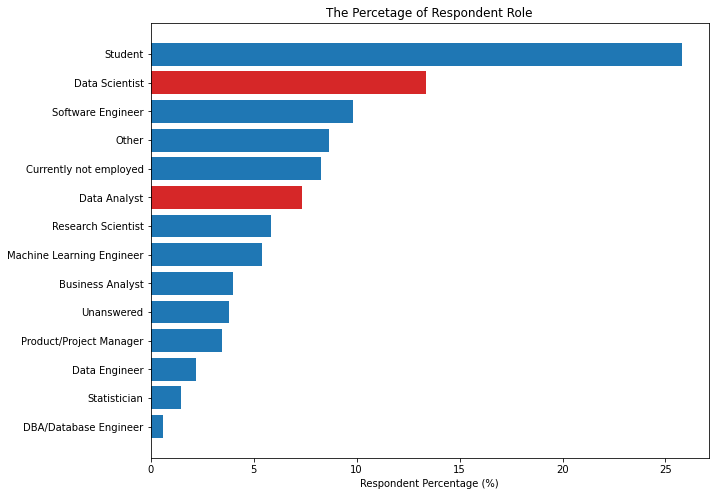

In [277]:
#Replace the null value with 'Unanswered' so we can know how much respondent didn't answer
dataset['Q5']=dataset['Q5'].replace(np.nan, 'Unanswered')

#Get the sum of unique value
role = dataset['Q5'].value_counts().keys()
role_count = dataset['Q5'].value_counts().tolist()

percentage_respondent = {}
for i in range(len(role)):
    percentage_respondent[role[i]]=round((role_count[i]/dataset.shape[0]*100),2)
    
color=[]
for i in range (len(percentage_respondent.keys())):
    if list(percentage_respondent.keys())[i] == 'Data Scientist' or list(percentage_respondent.keys())[i] =='Data Analyst':
        color.append('tab:red')
    else:
        color.append('tab:blue')

y = [i for i in percentage_respondent.keys()]

y_reverse=[]
for i in range(len(y)-1,-1,-1):
    y_reverse.append(y[i])

color_reverse=[]
for i in range(len(color)-1,-1,-1):
    color_reverse.append(color[i])

x = adjust_val(y_reverse, percentage_respondent)
        
plt.barh(y_reverse,x,color=color_reverse)
ax.set_yticklabels(y)
plt.xlabel('Respondent Percentage (%)')
plt.title('The Percetage of Respondent Role')
fig = plt.gcf()
fig.set_size_inches(10, 8)

**Am I too old to be a Data Analyst or Data Scientist?**

In [158]:
#Make new column of the average age from the age range
avg_age = []
for i in range(1,len(dataset['Q1'])):
    if '+' in dataset['Q1'][i]:
        avg_age.append(int(dataset['Q1'][i].split('+')[0]))
    else:
        avg_age.append((int(dataset['Q1'][i].split('-')[0])+int(dataset['Q1'][i].split('-')[1]))/2)
    
avg_age = pd.DataFrame(avg_age,columns=['avg_age'])
dataset['avg_age']=avg_age

<ipython-input-158-e63efb3cb2a8>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset['avg_age']=avg_age


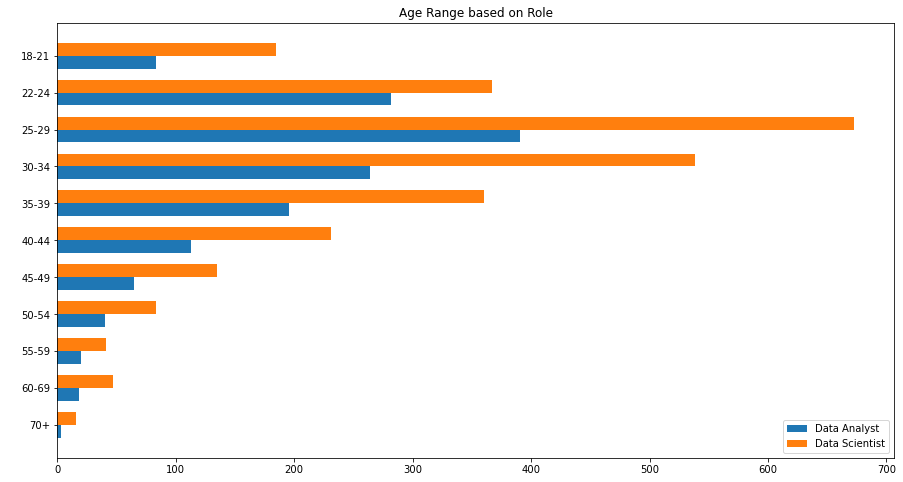

In [238]:
#Put it into dictionary 
Q1 = one_ans('Q1', data_analyst)
Q1_ds = one_ans('Q1', data_scientist)  

#Use sorted value of data analyst so we have to adjust for data scientist
labels_q1 = sort_bykeys(Q1)
label_q1 = [i for i in labels_q1]

label_reverse=[]
for i in range(len(label_q1)-1,-1,-1):
    label_reverse.append(label_q1[i])

da_q1 = adjust_val(label_reverse, Q1)
ds_q1 = adjust_val(label_reverse, Q1_ds)

hor_bar(label_reverse, da_q1, 'Data Analyst',  ds_q1, 'Data Scientist', 'Age Range based on Role',
         '', ' ', 15 ,8, 'lower right')

**Gender differencies based on Role**

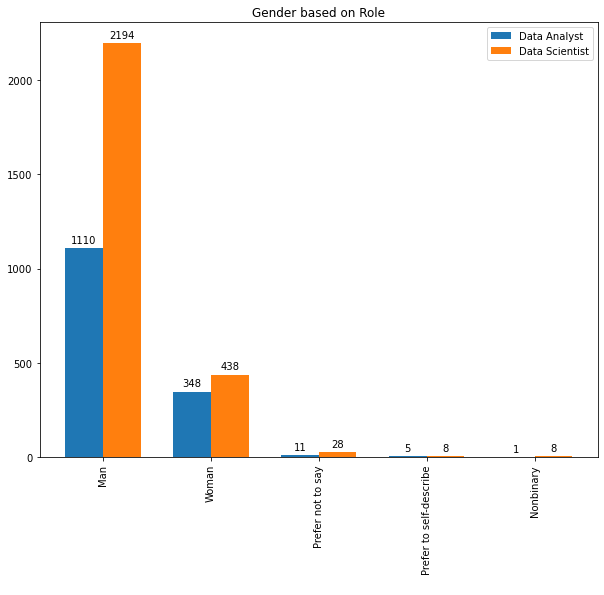

In [237]:
#Get the value and the number of respondent using function
q2_da = one_ans('Q2', data_analyst)
q2_ds = one_ans('Q2', data_scientist)

#Determine label for bar graph(based on data analyst sorted value)
q2_label = [i for i in q2_da.keys()]

da_q2 = adjust_val(q2_label, q2_da)
ds_q2 = adjust_val(q2_label, q2_ds)

#Plot a side by side bar
side_bar(q2_label, da_q2, 'Data Analyst', ds_q2, 'Data Scientist',  'Gender based on Role',
         ' ', '', 10 ,8)

**Do you have to have higher education?**

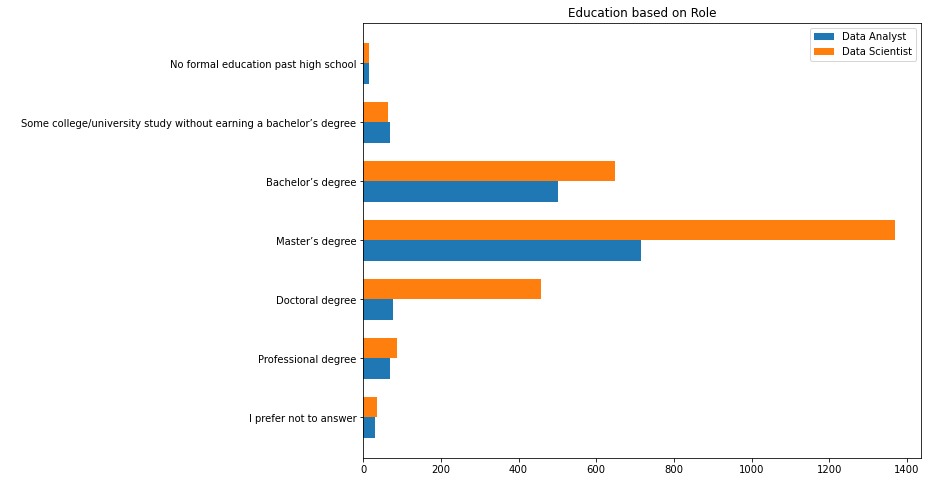

In [222]:
#Get the value and the number of respondent using function
q4_da = one_ans('Q4', data_analyst)
q4_ds = one_ans('Q4', data_scientist)

#Determine label for bar graph(based on data analyst sorted value)
q4_label = ['No formal education past high school','Some college/university study without earning a bachelor’s degree',
            'Bachelor’s degree','Master’s degree',
            'Doctoral degree','Professional degree','I prefer not to answer']

label_reverse=[]
for i in range(len(q4_label)-1,-1,-1):
    label_reverse.append(q4_label[i])

da_q4 = adjust_val(label_reverse, q4_da)
ds_q4 = adjust_val(label_reverse, q4_ds)

#Plot a side by side bar
hor_bar(label_reverse, da_q4, 'Data Analyst', ds_q4, 'Data Scientist', 
         'Education based on Role',' ', ' ', 10 ,8, 'upper right')

**On which platforms should I begin on data science courses?**

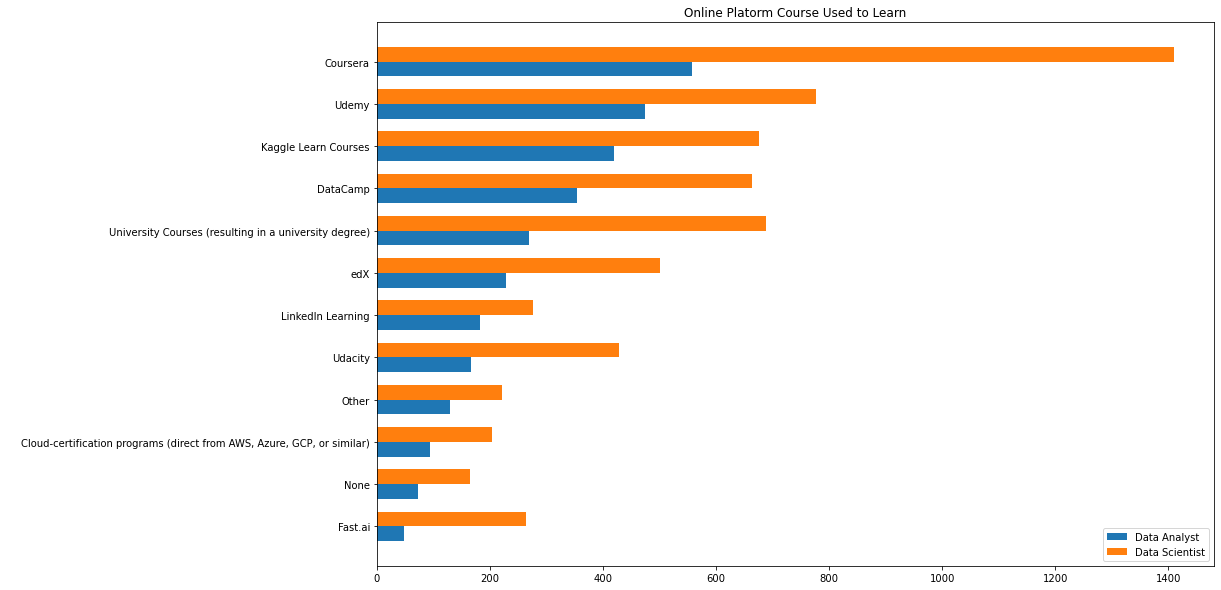

In [236]:
#Get the value and the number of respondent using function
q37_da = mul_q('Q37', data_analyst)
q37_ds = mul_q('Q37', data_scientist)

#Determine label for bar graph(based on data analyst sorted value)
q37_label = [i for i in q37_da.keys()]

label_reverse=[]
for i in range(len(q37_label)-1,-1,-1):
    label_reverse.append(q37_label[i])

da_q37 = adjust_val(label_reverse, q37_da)
ds_q37 = adjust_val(label_reverse, q37_ds)

#Plot a horiontal bar
hor_bar(label_reverse, da_q37, 'Data Analyst', ds_q37, 'Data Scientist',  'Online Platorm Course Used to Learn', '',
         ' ', 15 ,10, 'lower right')

**Do I have to know how to code?**

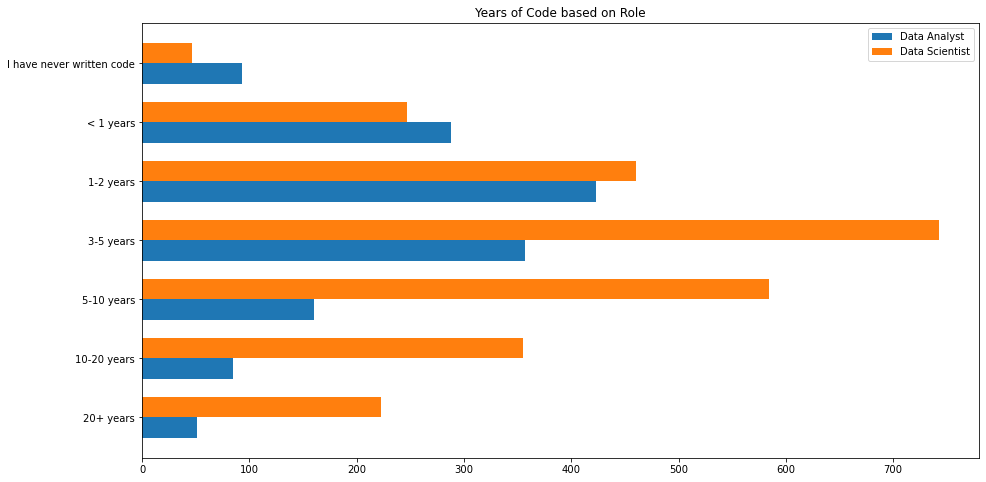

In [235]:
#Data Analyst
#Get the sum of unique value
Q6_da=one_ans('Q6', data_analyst)
    
#Sorted the keys range
#Seperate the number and sentences first so it will be easier
label_var = [i for i in Q6_da.keys() if len(i.split(' ')[0])==1]
label_num = [i for i in Q6_da.keys() if i not in label_var]
label = [label_num[0]]

for i in range(len(label_num)):
    if '+' in label_num[i]:
        ind = len(label_num)
        label[ind:ind]=[label_num[i]] 
    
    elif int(label_num[i].split('-')[0]) < int(label[0].split('-')[0]) :
            ind = 0
            label[ind:ind]=[label_num[i]]
            
    elif int(label_num[i].split('-')[0]) > int(label[0].split('-')[0]) :
            ind = len(label_num)
            label[ind:ind]=[label_num[i]]
            
#Add the sentences
for i in range(len(label_var)):
    if '<' in label_var[i]:
        ind = 0
        label[ind:ind]=[label_var[i]]
    else:
        ind = 0
        label[ind:ind]=[label_var[i]]
        
#Reverse the order list
label_reverse=[]
for i in range(len(label)-1,-1,-1):
    label_reverse.append(label[i])
    
#Data Scientist
#Get the sum of unique value
Q6_ds=one_ans('Q6', data_scientist)
    
#Get the value so the order is the same as label 
da_q6 = adjust_val(label_reverse, Q6_da)

ds_q6 = adjust_val(label_reverse, Q6_ds)
    

#Plot a horiontal bar
hor_bar(label_reverse, da_q6, 'Data Analyst', ds_q6, 'Data Scientist',  'Years of Code based on Role',
         '', '', 15 ,8, 'upper right')

**What programming language should I learn?**

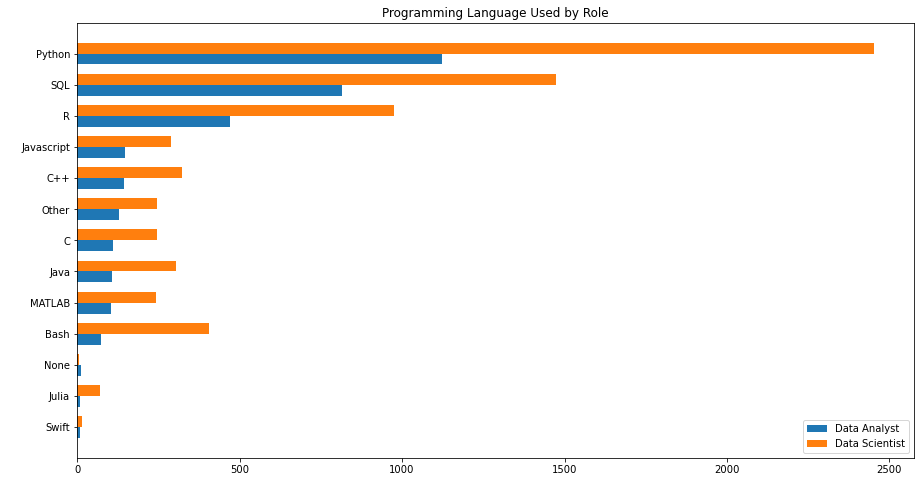

In [234]:
#Get the value and the number of respondent using function
q7_da = mul_q('Q7', data_analyst)
q7_ds = mul_q('Q7', data_scientist)

#Determine label for bar graph(based on data analyst sorted value)
q7_label = [i for i in q7_da.keys()]

label_reverse=[]
for i in range(len(q7_label)-1,-1,-1):
    label_reverse.append(q7_label[i])

da_q7 = adjust_val(label_reverse, q7_da)
ds_q7 = adjust_val(label_reverse, q7_ds)

#Plot a horiontal bar
hor_bar(label_reverse, da_q7, 'Data Analyst', ds_q7, 'Data Scientist',  'Programming Language Used by Role', '',
         ' ', 15 ,8, 'lower right')

**Do Data Analyst have to know machine learning?**

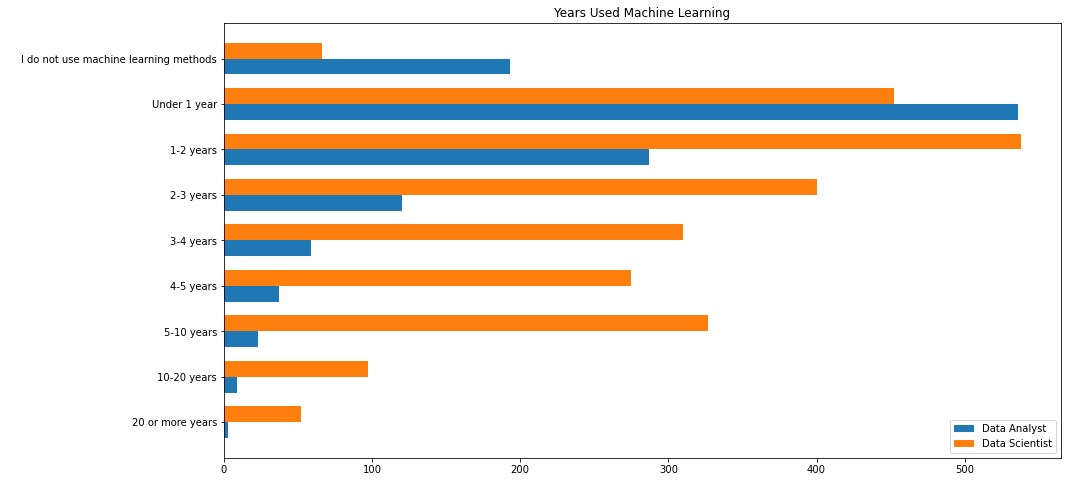

In [233]:
#Get the answer and the number of respondent using function
q15_da = one_ans('Q15',data_analyst)
q15_ds = one_ans('Q15',data_scientist)

#Sorted the keys range
#Seperate the number and sentences first so it will be easier
q15_label = [i for i in q15_da.keys()]

label_var = [i for i in q15_label if len(i.split(' ')[0])<=2 or 'Under' in i]
label_num = [i for i in q15_label if i not in label_var]
labels_q15 = [label_num[0]]

for i in range(len(label_num)):
    if int(label_num[i].split('-')[0]) < int(labels_q15[0].split('-')[0]) :
            ind = 0
            labels_q15[ind:ind]=[label_num[i]]
            
    elif int(label_num[i].split('-')[0]) > int(labels_q15[0].split('-')[0]) :
            ind = len(label_num)
            labels_q15[ind:ind]=[label_num[i]]
            
#Add the sentences
for i in range(len(label_var)):
    if 'Under' in label_var[i]:
        ind = 0
        labels_q15[ind:ind]=[label_var[i]]
    elif 'more' in label_var[i]:
        ind=len(labels_q15)
        labels_q15[ind:ind]=[label_var[i]]
    else:
        ind = 0
        labels_q15[ind:ind]=[label_var[i]]

label_reverse=[]
for i in range(len(labels_q15)-1,-1,-1):
    label_reverse.append(labels_q15[i])

        
#Re-adjust the keys
da_q15 = adjust_val(label_reverse, q15_da)
ds_q15 = adjust_val(label_reverse, q15_ds)

#Plot a side by side bar
hor_bar(label_reverse, da_q15, 'Data Analyst', ds_q15, 'Data Scientist',  'Years Used Machine Learning', '',
         ' ',  15,8, 'lower right')

**What machine learning algorithm used a lot?**

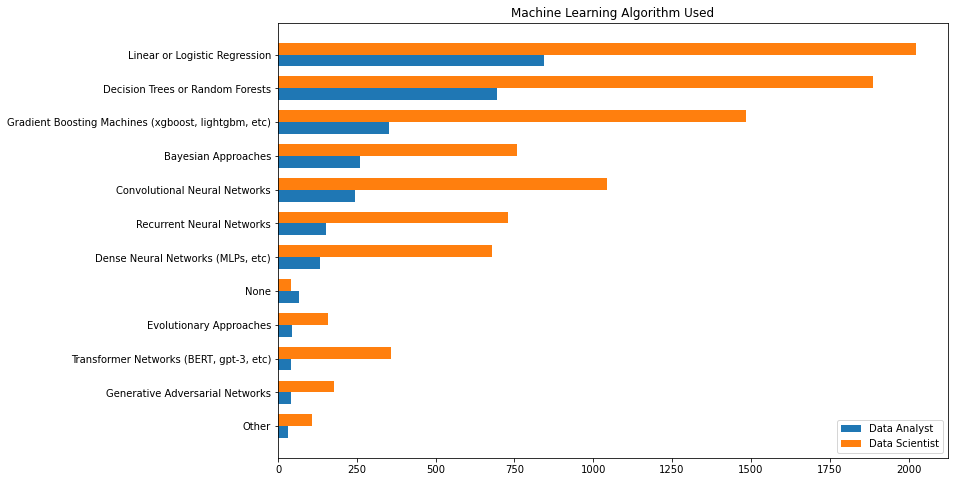

In [232]:
#Get the value and the number of respondent using function
q17_da = mul_q('Q17', data_analyst)
q17_ds = mul_q('Q17', data_scientist)

#Determine label for bar graph(based on data analyst sorted value)
q17_label = [i for i in q17_da.keys()]

label_reverse=[]
for i in range(len(q17_label)-1,-1,-1):
    label_reverse.append(q17_label[i])

da_q17 = adjust_val(label_reverse, q17_da)
ds_q17 = adjust_val(label_reverse, q17_ds)

#Plot a side by side bar
hor_bar(label_reverse, da_q17, 'Data Analyst', ds_q17, 'Data Scientist',  'Machine Learning Algorithm Used',
         '','', 12 ,8, 'lower right')

**What Machine Learning framework usually used?**

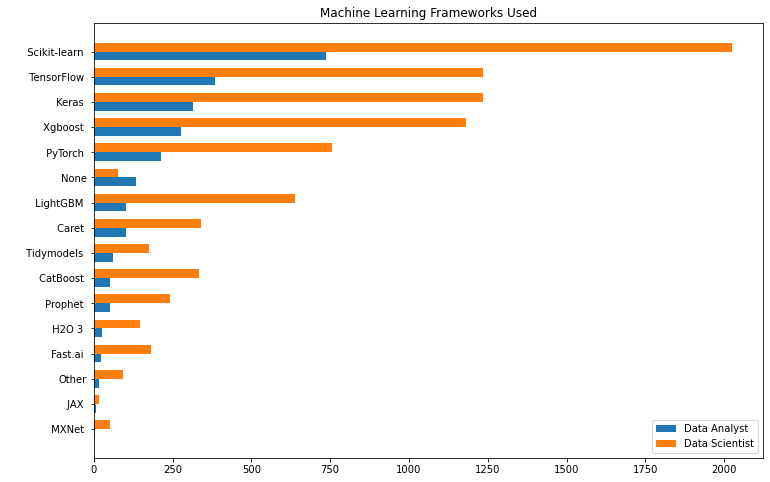

In [231]:
#Get the value and the number of respondent using function
q16_da = mul_q('Q16', data_analyst)
q16_ds = mul_q('Q16', data_scientist)

#Determine label for bar graph(based on data analyst sorted value)
q16_label = [i for i in q16_da.keys()]

label_reverse=[]
for i in range(len(q16_label)-1,-1,-1):
    label_reverse.append(q16_label[i])

da_q16 = adjust_val(label_reverse, q16_da)
ds_q16 = adjust_val(label_reverse, q16_ds)

#Plot a side by side bar
hor_bar(label_reverse, da_q16, 'Data Analyst', ds_q16, 'Data Scientist',  'Machine Learning Frameworks Used',
         '', ' ', 12 ,8, 'lower right')

**Which of the following integrated development environments (IDEs) do they use on a regular basis?**

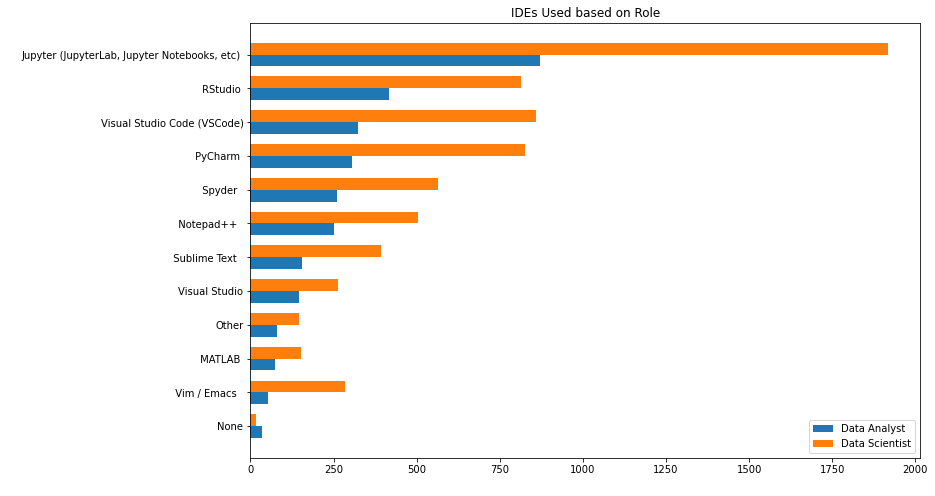

In [230]:
q9_da = mul_q('Q9', data_analyst)
q9_ds = mul_q('Q9', data_scientist)
    
#Use sorted value of data analyst so we have to adjust for data scientist
q9_label = [i for i in q9_da.keys()]

label_reverse=[]
for i in range(len(q9_label)-1,-1,-1):
    label_reverse.append(q9_label[i])

da_q9 = adjust_val(label_reverse, q9_da)
ds_q9 = adjust_val(label_reverse, q9_ds)

#Plot a side by side bar
hor_bar(label_reverse, da_q9, 'Data Analyst', ds_q9, 'Data Scientist',  'IDEs Used based on Role',
         ' ', ' ', 12 ,8, 'lower right')

**What data visualization libraries or tools do they use on a regular basis?**

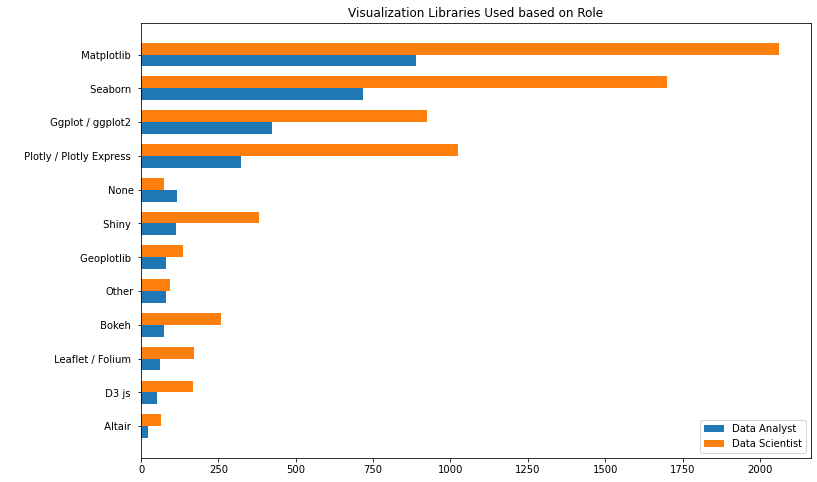

In [241]:
q14_da = mul_q('Q14', data_analyst)
q14_ds = mul_q('Q14', data_scientist)
    
#Use sorted value of data analyst so we have to adjust for data scientist
q14_label = [i for i in q14_da.keys()]

label_reverse=[]
for i in range(len(q14_label)-1,-1,-1):
    label_reverse.append(q14_label[i])

da_q14 = adjust_val(label_reverse, q14_da)
ds_q14 = adjust_val(label_reverse, q14_ds)

#Plot a side by side bar
hor_bar(label_reverse, da_q14, 'Data Analyst', ds_q14, 'Data Scientist',  'Visualization Libraries Used based on Role',
         '', ' ', 12 ,8, 'lower right')

**Activities that make up an important part of their role at work (Data Analyst vs Data Scientist)**

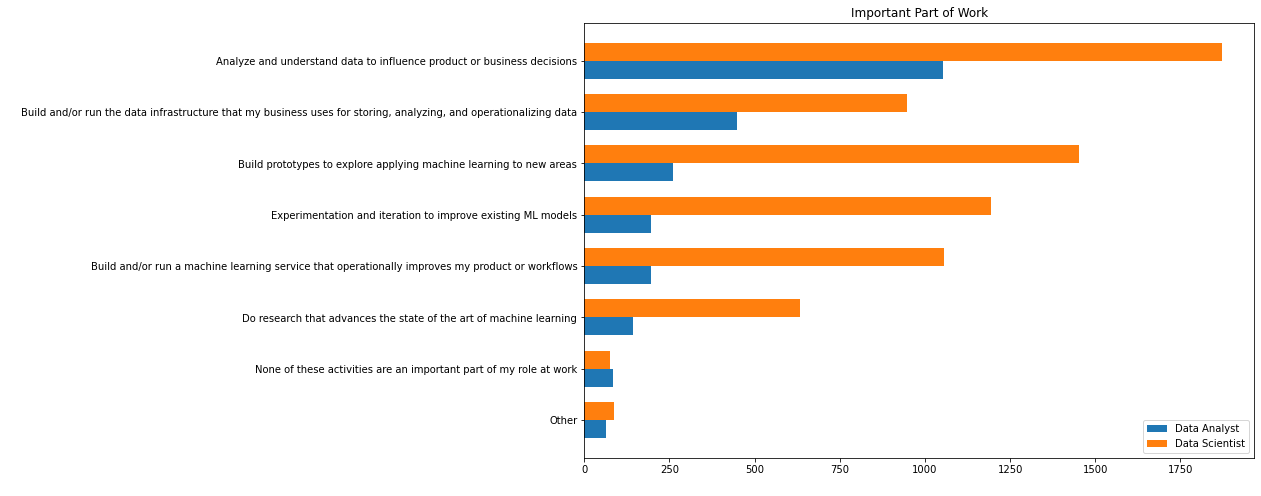

In [242]:
q23_da = mul_q('Q23', data_analyst)
q23_ds = mul_q('Q23', data_scientist)
    
#Use sorted value of data analyst so we have to adjust for data scientist
q23_label = [i for i in q23_da.keys()]

label_reverse=[]
for i in range(len(q23_label)-1,-1,-1):
    label_reverse.append(q23_label[i])

da_q23 = adjust_val(label_reverse, q23_da)
ds_q23 = adjust_val(label_reverse, q23_ds)

#Plot a side by side bar
hor_bar(label_reverse, da_q23, 'Data Analyst', ds_q23, 'Data Scientist',  'Important Part of Work',
         ' ', ' ', 12 ,8, 'lower right')

**what are their favorite media sources that report on data science topics?**

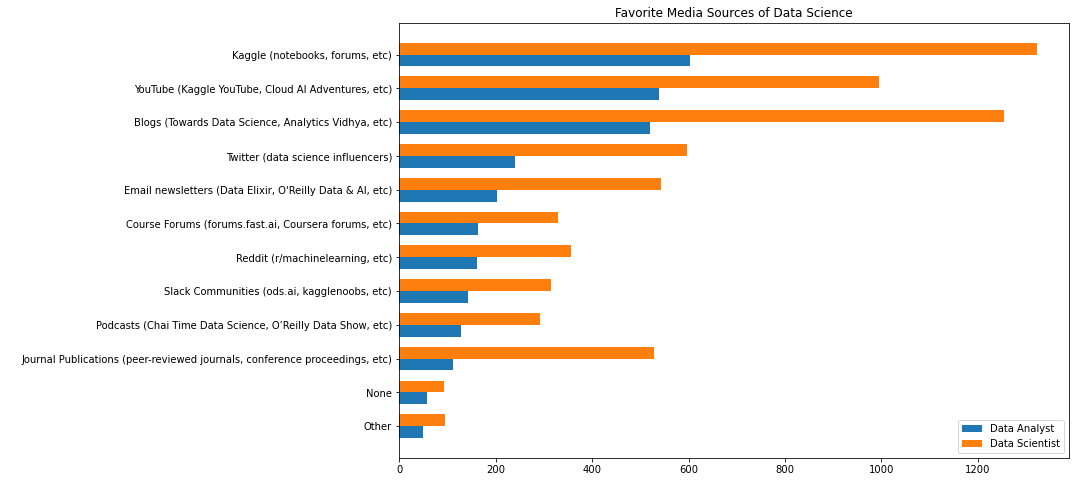

In [244]:
q39_da = mul_q('Q39', data_analyst)
q39_ds = mul_q('Q39', data_scientist)
    
#Use sorted value of data analyst so we have to adjust for data scientist
q39_label = [i for i in q39_da.keys()]

label_reverse=[]
for i in range(len(q39_label)-1,-1,-1):
    label_reverse.append(q39_label[i])

da_q39 = adjust_val(label_reverse, q39_da)
ds_q39 = adjust_val(label_reverse, q39_ds)

#Plot a side by side bar
hor_bar(label_reverse, da_q39, 'Data Analyst', ds_q39, 'Data Scientist',  'Favorite Media Sources of Data Science',
         ' ', ' ', 12 ,8, 'lower right')

**Where do you publicly share or deploy your data analysis or machine learning applications?**

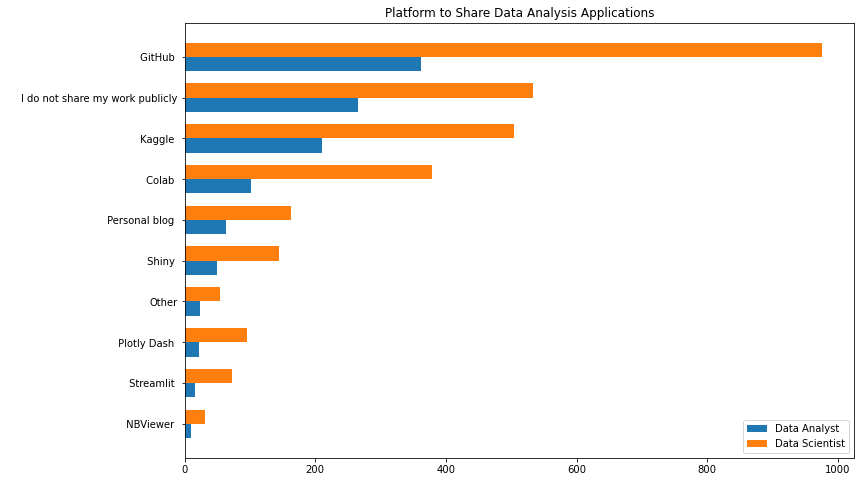

In [245]:
q36_da = mul_q('Q36', data_analyst)
q36_ds = mul_q('Q36', data_scientist)
    
#Use sorted value of data analyst so we have to adjust for data scientist
q36_label = [i for i in q36_da.keys()]

label_reverse=[]
for i in range(len(q36_label)-1,-1,-1):
    label_reverse.append(q36_label[i])

da_q36 = adjust_val(label_reverse, q36_da)
ds_q36 = adjust_val(label_reverse, q36_ds)

#Plot a side by side bar
hor_bar(label_reverse, da_q36, 'Data Analyst', ds_q36, 'Data Scientist',  'Platform to Share Data Analysis Applications',
         ' ', ' ', 12 ,8, 'lower right')

**What  big data products (relational databases, data warehouses, data lakes, or similar) do they use on a regular basis?**

In [246]:
#Data Analysis
#Get the column name for the Q26 part
q29_a_da = [i for i in dataset.columns if 'Q29_A' in i]

#Get the multiple answer from each columns
Q_answer_da = []
for i in q29_a_da : 
    Q_answer_da.extend(data_analyst[i].value_counts().keys())

#Get value count from each columns
Q_count_da = []
for i in q29_a_da : 
    Q_count_da.extend(data_analyst[i].value_counts().tolist())

#Put it into dictionary
Q_29_da = {}
for i in range(len(Q_answer_da)):
    Q_29_da[Q_answer_da[i]]=Q_count_da[i]

#Sort based on the value
Q_29_da = dict(sorted(Q_29_da.items(), key=lambda item: item[1], reverse=True))


#Data Scientist
#Get the column name for the Q26 part
q29_a_ds = [i for i in dataset.columns if 'Q29_A' in i]

#Get the multiple answer from each columns
Q_answer_ds = []
for i in q29_a_ds : 
    Q_answer_ds.extend(data_scientist[i].value_counts().keys())

#Get value count from each columns
Q_count_ds = []
for i in q29_a_ds : 
    Q_count_ds.extend(data_scientist[i].value_counts().tolist())

#Put it into dictionary
Q_29_ds = {}
for i in range(len(Q_answer_ds)):
    Q_29_ds[Q_answer_ds[i]]=Q_count_ds[i]

#Sort based on the value
Q_29_ds = dict(sorted(Q_29_ds.items(), key=lambda item: item[1], reverse=True))

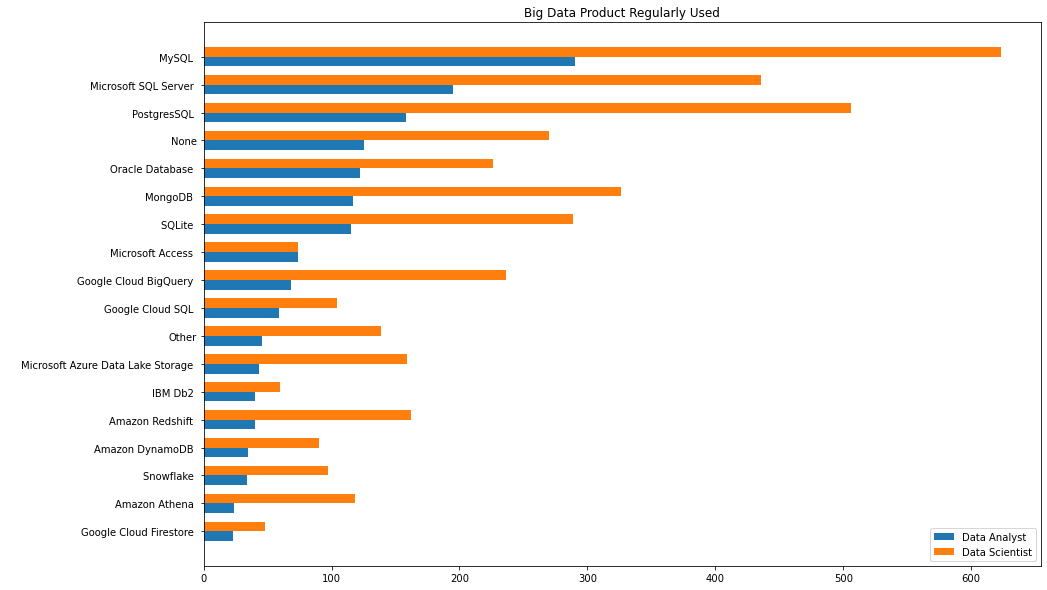

In [248]:
#Determine label for bar graph(based on data analyst sorted value)
q29_label = [i for i in Q_29_da.keys()]

label_reverse=[]
for i in range(len(q29_label)-1,-1,-1):
    label_reverse.append(q29_label[i])

da_q29_a = adjust_val(label_reverse, Q_29_da)
ds_q29_a = adjust_val(label_reverse, Q_29_ds)

#Plot a side by side bar
hor_bar(label_reverse, da_q29_a, 'Data Analyst', ds_q29_a, 'Data Scientist',  'Big Data Product Regularly Used',
         '', ' ', 15 ,10, 'lower right')

**What business intelligence tools do you use on a regular basis?**

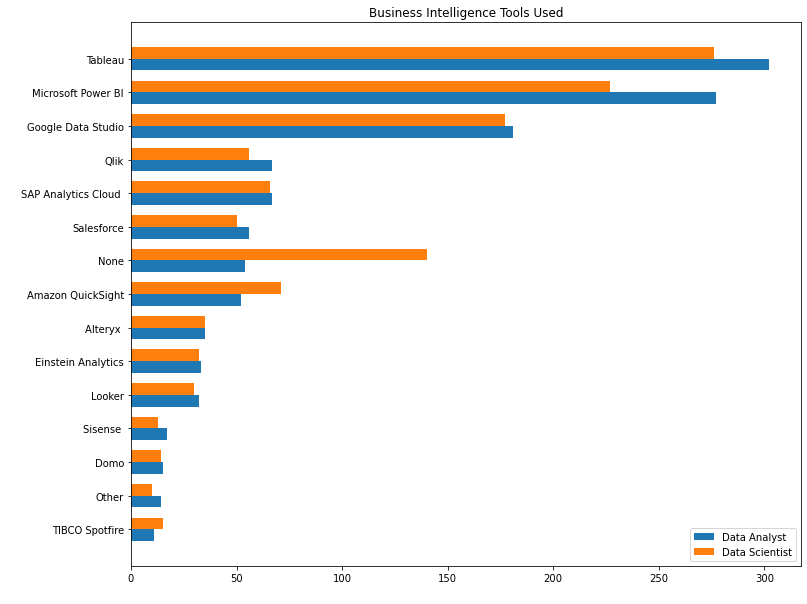

In [251]:
q31_da = mul_q('Q31', data_analyst)
q31_ds = mul_q('Q31', data_scientist)
    
#Use sorted value of data analyst so we have to adjust for data scientist
q31_label = [i for i in q31_da.keys()]

label_reverse=[]
for i in range(len(q31_label)-1,-1,-1):
    label_reverse.append(q31_label[i])

da_q31 = adjust_val(label_reverse, q31_da)
ds_q31 = adjust_val(label_reverse, q31_ds)

#Plot a side by side bar
hor_bar(label_reverse, da_q31, 'Data Analyst', ds_q31, 'Data Scientist',  'Business Intelligence Tools Used',
         ' ', ' ', 12 ,10, 'lower right')